In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
data = pd.read_csv('universe.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,campaign_name,campaign_month,campaign_group,Date,campaign_spend,num_applied,num_offered,num_accepted,num_funded
0,1808 Social Channel - Group 1a,201808,group_1a,2018-09-20,181.136108,3,2,1,1
1,1808 Social Channel - Group 1a,201808,group_1a,2018-09-21,341.138561,17,10,3,2
2,1808 Social Channel - Group 1a,201808,group_1a,2018-09-22,191.027183,9,7,2,0
3,1808 Social Channel - Group 1a,201808,group_1a,2018-09-23,391.519210,9,6,3,2
4,1808 Social Channel - Group 1a,201808,group_1a,2018-09-24,502.003845,11,7,2,1


In [118]:
#Aggregate at overall level
overall = data.groupby('campaign_name').sum()
overall['cpa'] = overall.campaign_spend/overall.num_applied
overall['cpo'] = overall.campaign_spend/overall.num_offered
overall['cpoa'] = overall.campaign_spend/overall.num_accepted
overall['cpfl'] = overall.campaign_spend/overall.num_funded

#Drop columns we don't need
overall.drop(['campaign_month', 'campaign_spend', 'num_applied', 'num_offered', 'num_accepted', 'num_funded'], 
             axis = 1, inplace = True)
overall.head(20)

,cpa,cpo,cpoa,cpfl
campaign_name,,,,
1808 Social Channel - Group 1a,33.786480,52.589391,140.646046,302.389000
1808 Social Channel - Group 1b,34.449364,51.674046,155.022138,852.621760
1808 Social Channel - Group 2,52.998187,92.010741,220.825778,473.198095
1808 Social Channel - Group 3a,3.024845,5.564606,13.919486,28.080351
1808 Social Channel - Group 3b,25.963893,38.105282,121.761707,252.220679
1808 Social Channel - Group 3c,44.901058,67.351587,204.095719,396.185807
1808 Social Channel - Group 3d,155.474829,213.058099,522.960789,958.761446
1809 Social Channel - Group 1b - Test 1,38.013757,55.409883,121.080856,408.647888
1809 Social Channel - Group 1b - Test 3,72.777193,142.643299,419.539115,1018.880709


In [123]:
#Aggregate at campaign month level
monthly = data.groupby('campaign_month').sum()
monthly['cpa'] = monthly.campaign_spend/monthly.num_applied
monthly['cpo'] = monthly.campaign_spend/monthly.num_offered
monthly['cpoa'] = monthly.campaign_spend/monthly.num_accepted
monthly['cpfl'] = monthly.campaign_spend/monthly.num_funded

#Drop columns we don't need
monthly.drop(['campaign_spend', 'num_applied', 'num_offered', 'num_accepted', 'num_funded'], 
             axis = 1, inplace = True)
monthly.head()

,cpa,cpo,cpoa,cpfl
campaign_month,,,,
201808,16.905506,28.753715,76.559891,159.499772
201809,34.811796,56.395110,160.775532,383.841060


In [126]:
#Cumulative sum
cumsum = data.groupby(['campaign_group', 'Date']).sum().groupby(level = 0).cumsum()

#Create the view
view = data.sort_values(['campaign_group', 'Date'])
view.set_index(['campaign_group', 'Date'], inplace = True)
view['campaign_spend_cum'] = cumsum['campaign_spend']
view['num_applied_cum'] = cumsum['num_applied']
view['num_funded_cum'] = cumsum['num_funded']

#Drop columns
view.drop(['campaign_name', 'campaign_spend', 'num_applied', 'num_offered', 'num_accepted', 
           'num_funded'],axis = 1, inplace = True)
view.reset_index(inplace = True)

(0, 26000)

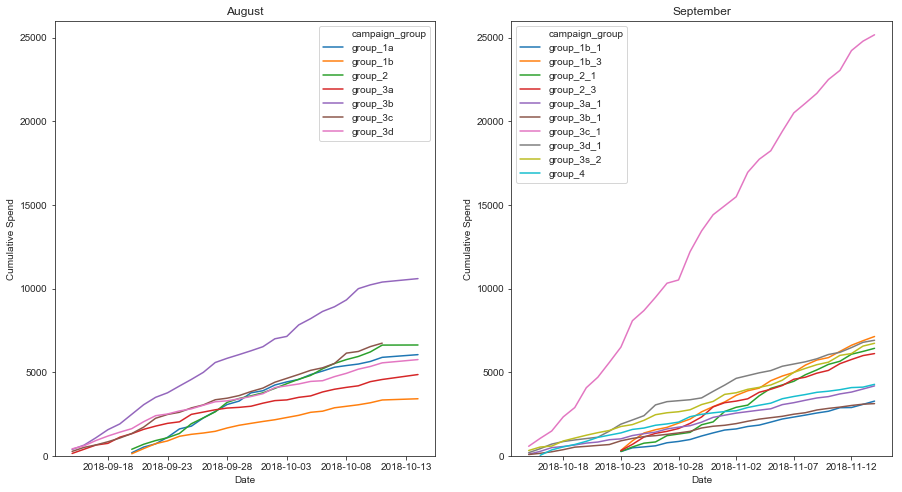

In [125]:
#Visualization: Spend
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 8))

sns.lineplot(x = 'Date', y = 'campaign_spend_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201808], ax = ax[0])
sns.lineplot(x = 'Date', y = 'campaign_spend_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201809], ax = ax[1])

ax[0].set(title = 'August', xlabel = 'Date', ylabel = 'Cumulative Spend')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0].set_ylim([0, 26000])

ax[1].set(title = 'September', xlabel = 'Date', ylabel = 'Cumulative Spend')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1].set_ylim([0, 26000])

(0, 1700)

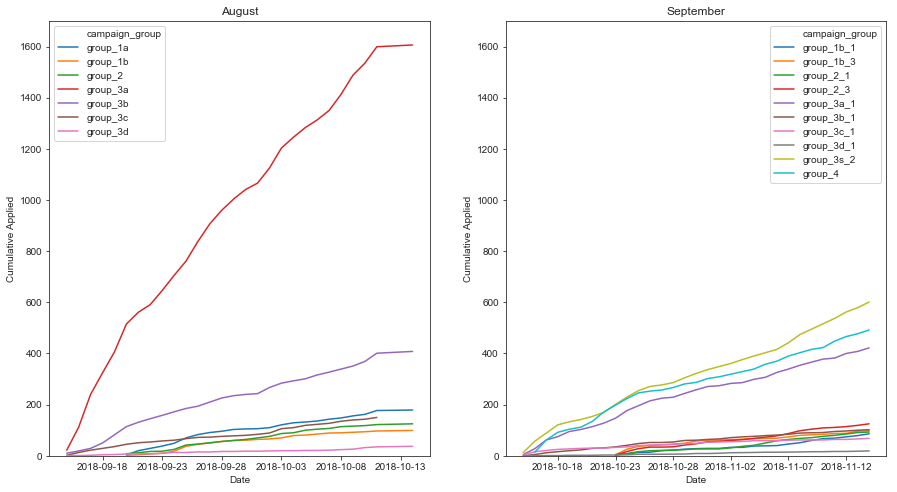

In [114]:
#Visualization: Applied
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 8))

sns.lineplot(x = 'Date', y = 'num_applied_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201808], ax = ax[0])
sns.lineplot(x = 'Date', y = 'num_applied_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201809], ax = ax[1])

ax[0].set(title = 'August', xlabel = 'Date', ylabel = 'Cumulative Applied')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0].set_ylim([0, 1700])

ax[1].set(title = 'September', xlabel = 'Date', ylabel = 'Cumulative Applied')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1].set_ylim([0, 1700])

(0, 180)

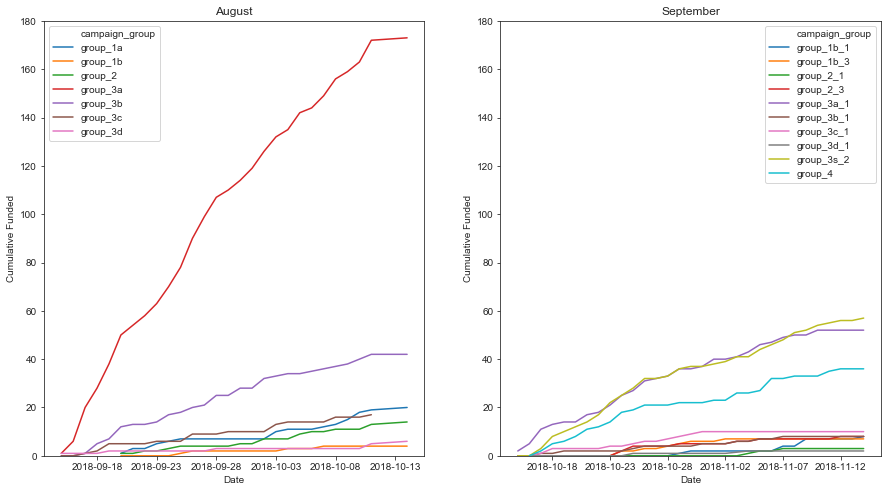

In [117]:
#Visualization: Funded
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 8))

sns.lineplot(x = 'Date', y = 'num_funded_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201808], ax = ax[0])
sns.lineplot(x = 'Date', y = 'num_funded_cum', hue = 'campaign_group',
             data = view[view['campaign_month'] == 201809], ax = ax[1])

ax[0].set(title = 'August', xlabel = 'Date', ylabel = 'Cumulative Funded')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0].set_ylim([0, 180])

ax[1].set(title = 'September', xlabel = 'Date', ylabel = 'Cumulative Funded')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1].set_ylim([0, 180])